In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns
pd.set_option('display.max_columns', None)

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [25]:
%%R 

require('tidyverse')
require('tidyr')
require('stringr')
require('zoo')


# Load and clean data

In [4]:
# Load data

points = pd.read_csv('points.csv')
display(points.head(5))

fees = pd.read_csv('fees.csv')
display(fees.head(5))



,Squad,Pts_2023,Pts_2022,Pts_2021,Pts_2020,Pts_2019,Pts_2018,Pts_2017,Pts_2016,Pts_2015,Pts_2014,Pts_2013,Pts_2012,Pts_2011,Pts_2010,Pts_2009,Pts_2008,Pts_2007,Pts_2006,Pts_2005,Pts_2004,Pts_2003,Pts_2002,Pts_2001,Pts_2000,Pts_1999,Pts_1998,Pts_1997,Pts_1996,Pts_1995,Total_Pts
0,Arsenal,81.0,69.0,61.0,56.0,70.0,63.0,75.0,71.0,75.0,79.0,73.0,70.0,68.0,75.0,72.0,83.0,68.0,67.0,83.0,90.0,78.0,87.0,70.0,73.0,78.0,78.0,68.0,63.0,51.0,6285.0
1,Aston Villa,54.0,45.0,55.0,35.0,NaN,NaN,NaN,17.0,38.0,38.0,41.0,38.0,48.0,64.0,62.0,60.0,50.0,42.0,47.0,56.0,45.0,50.0,54.0,58.0,55.0,57.0,61.0,63.0,48.0,3843.0
2,Bournemouth,39.0,NaN,NaN,34.0,45.0,44.0,46.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0
3,Brentford,50.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288.0
4,Brighton,55.0,51.0,41.0,41.0,36.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,792.0


,club_name,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFC Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055,8.520,55.76,64.38,34.30,111.80,89.535,93.55,39.54,83.10
1,Arsenal,7.850,3.560,11.380,20.550,14.255,30.445,16.70,66.95,105.825,44.685,21.05,28.475,16.380,71.000,27.925,87.675,65.95,59.7,31.1,143.770,121.85,61.400,146.780,29.00,123.35,314.85,89.25,214.450,105.15,198.80,216.16
2,Aston Villa,4.824,5.401,16.637,15.971,12.487,13.850,67.78,14.92,41.935,42.975,15.98,8.670,13.565,22.940,26.525,42.800,63.42,69.0,65.8,64.085,31.03,27.940,14.765,131.25,131.30,20.63,35.25,162.500,104.12,256.80,154.14
3,Brentford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.400,35.90,19.55,26.49,41.50,75.570,69.30,37.70,55.10
4,Brighton & Hove Albion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750,4.015,NaN,NaN,NaN,NaN,NaN,7.897,3.69,7.195,17.020,13.47,8.75,66.90,100.74,70.240,49.10,153.50,193.63


In [13]:
%%R -i points,fees

# pivot longer

points <- points %>% 
    pivot_longer(cols=-Squad, names_to='year', values_to='points') %>% 
    mutate(year = as.integer(str_replace(year, 'Pts_', ''))) %>%
    mutate(Squad = str_replace(Squad, 'Nott\'ham Forest', 'Nottingham Forest')) 


fees <- fees %>% 
  pivot_longer(cols = -club_name, values_to='fees') %>% 
  mutate(year = as.integer(name)) %>% 
  select(-name) %>% # drops name column
  mutate(club_name = str_replace_all(club_name, c('AFC ' = '', 
                                                    ' & Hove Albion' = '', 
                                                    'Huddersfield Town' = 'Huddersfield', 
                                                    'Tottenham Hotspur' = 'Tottenham', 
                                                    'West Bromwich Albion' = 'West Brom', 
                                                    'West Ham United' = 'West Ham', 
                                                    'Wolverhampton Wanderers' = 'Wolves')))



In [14]:
%%R -o points_clubs,fees_clubs
points_clubs <- points %>% select(Squad)  %>% arrange(Squad) %>% unique()
fees_clubs <- fees %>% select(club_name) %>% arrange(club_name) %>% unique()



In [15]:
# Note, these exist in points and note fees, that's because they were relegated
set(points_clubs.Squad.unique()) - set(fees_clubs.club_name.unique())

{'Barnsley',
 'Birmingham City',
 'Blackburn',
 'Blackpool',
 'Bolton',
 'Bradford City',
 'Charlton Ath',
 'Coventry City',
 'Derby County',
 'Hull City',
 'Ipswich Town',
 'Middlesbrough',
 'Portsmouth',
 'QPR',
 'Reading',
 'Sheffield Weds',
 'Southampton',
 'Sunderland',
 'Wigan Athletic',
 'Wimbledon'}

In [16]:
# no clubs in fees but not points
set(fees_clubs.club_name.unique()) - set(points_clubs.Squad.unique())

set()

In [17]:
fees.club_name.unique()

array(['AFC Bournemouth', 'Arsenal', 'Aston Villa', 'Brentford',
       'Brighton & Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town',
       'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Sheffield United', 'Stoke City',
       'Swansea City', 'Tottenham Hotspur', 'Watford',
       'West Bromwich Albion', 'West Ham United',
       'Wolverhampton Wanderers'], dtype=object)

## Join

In [20]:
%%R -o df

# merge fees and points on club_name and Squad respectively
df <- fees %>% merge(points, by.x = c('club_name','year'), by.y = c('Squad','year')) 
df %>% head()


  club_name year    fees points
1   Arsenal 1995  20.550     51
2   Arsenal 1996  14.255     63
3   Arsenal 1997  30.445     68
4   Arsenal 1998  16.700     78
5   Arsenal 1999  66.950     78
6   Arsenal 2000 105.825     73


# Analysis

In [28]:
%%R 

# TODO  - make sure that if a year is mising, it is rollmeanr is dividing by 3 and not 4
# calculate a column that is fees from the last 4 years of a club
df <- df %>% 
    group_by(club_name) %>%
    mutate(
        fees_4 = rollsumr(fees, 4, fill = NA),
        points_4_avg = rollmeanr(points, 4, fill = NA)
    ) %>%
    ungroup() %>% 
    filter(year > 1997)

df

# A tibble: 700 × 6
   club_name  year  fees points fees_4 points_4_avg
   <chr>     <int> <dbl>  <dbl>  <dbl>        <dbl>
 1 Arsenal    1998  16.7     78   82.0         65  
 2 Arsenal    1999  67.0     78  128.          71.8
 3 Arsenal    2000 106.      73  220.          74.2
 4 Arsenal    2001  44.7     70  234.          74.8
 5 Arsenal    2002  21.0     87  239.          77  
 6 Arsenal    2003  28.5     78  200.          77  
 7 Arsenal    2004  16.4     90  111.          81.2
 8 Arsenal    2005  71       83  137.          84.5
 9 Arsenal    2006  27.9     67  144.          79.5
10 Arsenal    2007  87.7     68  203.          77  
# ℹ 690 more rows
# ℹ Use `print(n = ...)` to see more rows


`geom_smooth()` using formula = 'y ~ x'


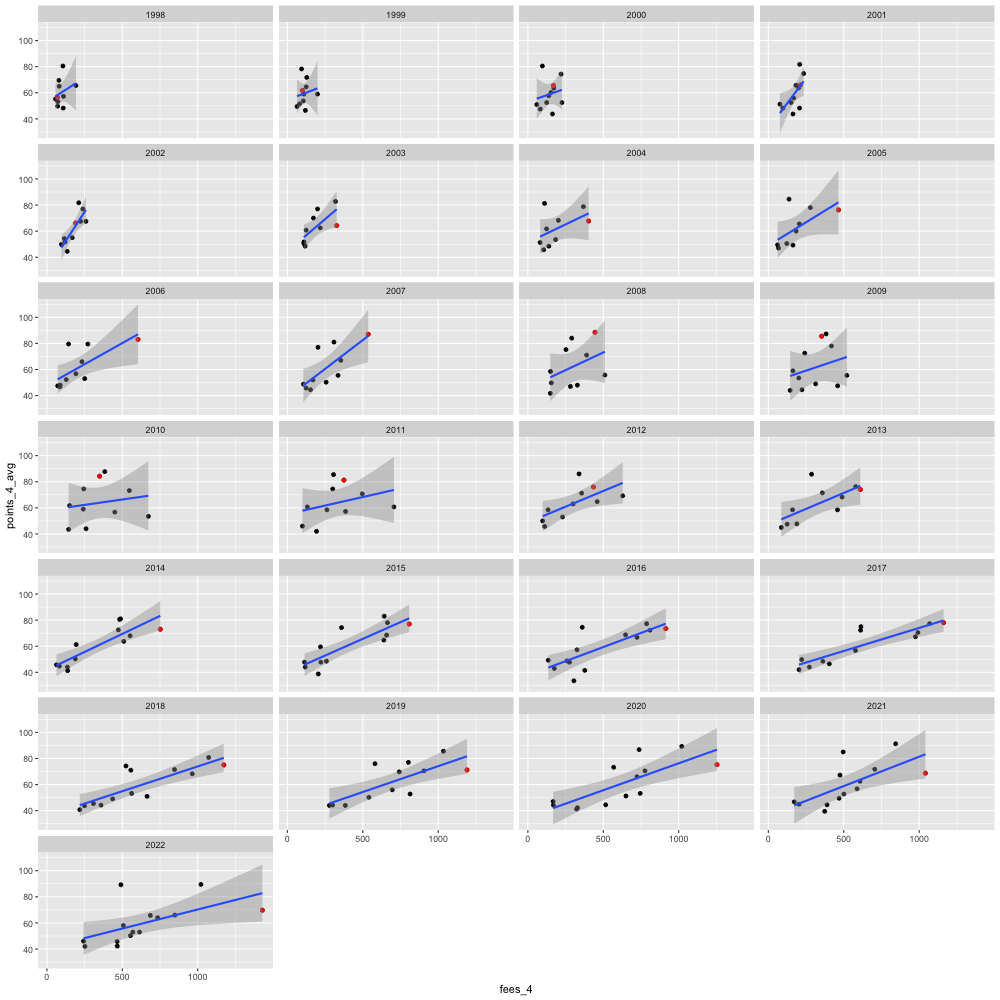

In [36]:
%%R -w 1000 -h 1000
# Exploratory data analysis

ggplot(df) +
    aes(x=fees_4, y=points_4_avg) +
    geom_point() +
    geom_point(data = df %>% filter(club_name == "Chelsea"), color='red') +
    geom_smooth(method='lm') +
    facet_wrap(~year, ncol=4)


In [ ]:
# To do next

- run regressions for each year y=points_4_avg , x=fees_4
- look at r^2 of those for each year and p-values
- residuals for each club over time
